<a href="https://colab.research.google.com/github/timothy2077/1st-Rep/blob/master/Exploration_Project%20E_082324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow

print(tensorflow.__version__)

2.17.0


## Step 1. 데이터 수집하기

In [4]:
# 필요한 라이브러리 설치
!pip install pandas

# 데이터 다운로드
!wget https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv

# 데이터 읽기
import pandas as pd
data = pd.read_csv('ChatbotData.csv')
print(data.head())


--2024-08-22 23:56:26--  https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 889842 (869K) [text/plain]
Saving to: ‘ChatbotData.csv’

ChatbotData.csv     100%[===================>] 868.99K  4.90MB/s    in 0.2s    

2024-08-22 23:56:26 (4.90 MB/s) - ‘ChatbotData.csv’ saved [889842/889842]

                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0


## Step 2. 데이터 전처리하기


### A. 전처리 작업들

#### a. 결측값 제거: 데이터셋에서 결측값을 제거하기
#### b. 한글 외의 문자 제거: 정규 표현식을 사용하여 한글 외의 문자를 제거하기
#### c. 공백 제거: 문자열의 앞뒤 공백을 제거하기
#### d. 데이터셋 분할: 데이터를 훈련 데이터와 테스트 데이터로 분할하기

In [5]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# 데이터 로드
data = pd.read_csv('ChatbotData.csv')

# 데이터 확인
print(data.head())

# 결측값 제거
data = data.dropna()

# 한글 외의 문자 제거
def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)
    return text

data['Q'] = data['Q'].apply(clean_text)
data['A'] = data['A'].apply(clean_text)

# 소문자 변환 (한글 데이터에는 필요 없을 수 있음)
# data['Q'] = data['Q'].str.lower()
# data['A'] = data['A'].str.lower()

# 공백 제거
data['Q'] = data['Q'].str.strip()
data['A'] = data['A'].str.strip()

# 데이터셋 분할 (훈련 데이터와 테스트 데이터)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 전처리된 데이터 확인
print(train_data.head())
print(test_data.head())

# 전처리된 데이터를 저장 (필요한 경우)
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0
                      Q                 A  label
10512           엄청 로맨틱해       생각만해도 달콤하네요      2
1199         대리님이 너무 갈궈      더 웃으면서 대해보세요      0
9841   사내커플인데 비밀연애임 답답해  비밀연애가 말도 못하고 힘들죠      2
5595        그 사람이 참 그리워            사랑했나봐요      1
7228                  왜             궁금하네요      1
               Q             A  label
8169      죽을거 같네  나쁜 생각 하지 마세요      1
900      내일 시험이야    컨디션 조절 하세요      0
8075  정말내 자신이 싫다    자신은 사랑해주세요      1
7625     이별후 네달째  바쁘게 살면서 잊어가요      1
2816     쌍커풀 해볼까       눈은 기본이죠      0


### Analysis:

일반적인 대화 (label 0):
예시:
Q: “12시 땡!”
A: “하루가 또 가네요.”
Q: “1지망 학교 떨어졌어”
A: “위로해 드립니다.”
일반적인 일상 대화나 위로의 말을 포함

감정적인 대화 (label 1):
예시:
Q: “그 사람이 참 그리워”
A: “사랑했나봐요.”
Q: “죽을거 같네”
A: “나쁜 생각 하지 마세요.”
감정적인 표현이나 위로의 말을 포함

로맨틱한 대화 (label 2):
예시:
Q: “엄청 로맨틱해”
A: “생각만해도 달콤하네요.”
Q: “사내커플인데 비밀연애임 답답해”
A: “비밀연애가 말도 못하고 힘들죠.”
로맨틱한 감정이나 연애 관련 대화를 포함

## Step 3. SubwordTextEncoder 사용하기

### A.내부단어 토크나이저인 SubwordTextEncoder 사용하기

#### 1. TensorFlow Datasets SubwordTextEncoder 를 토크나이저로 사용한다.  단어보다 더 작은 단위인 Subword를 기준으로 토크나이징하고,  각 토큰을 고유한 정수로 인코딩 한다.

#### 2. 각 문장을 토큰화하고 각 문장의 시작과 끝을 나타내는 START_TOKEN 및 END_TOKEN을 추가한다.

#### 3. 최대 길이 MAX_LENGTH 인 40을 넘는 문장들은 필터링한다.

#### 4. MAX_LENGTH보다 길이가 짧은 문장들은 40에 맞도록 패딩한다.


In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# 데이터 로드
data = pd.read_csv('ChatbotData.csv')

# 데이터 확인
print(data.head())

# 결측값 제거
data = data.dropna()

# 한글 외의 문자 제거
def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)
    return text

data['Q'] = data['Q'].apply(clean_text)
data['A'] = data['A'].apply(clean_text)

# 공백 제거
data['Q'] = data['Q'].str.strip()
data['A'] = data['A'].str.strip()

# 데이터셋 분할 (훈련 데이터와 테스트 데이터)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 전처리된 데이터 확인
print(train_data.head())
print(test_data.head())

# TensorFlow Datasets SubwordTextEncoder를 사용하여 토크나이저 정의
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    train_data['Q'].tolist() + train_data['A'].tolist(), target_vocab_size=2**13)

# 시작과 끝을 나타내는 토큰 정의
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 최대 길이 정의
MAX_LENGTH = 40

# 문장을 토큰화하고 시작과 끝 토큰 추가
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs

# 훈련 데이터 토큰화 및 필터링
train_inputs, train_outputs = tokenize_and_filter(train_data['Q'], train_data['A'])

# 테스트 데이터 토큰화 및 필터링
test_inputs, test_outputs = tokenize_and_filter(test_data['Q'], test_data['A'])

# 전처리된 데이터 확인
print(train_inputs[:5])
print(train_outputs[:5])
print(test_inputs[:5])
print(test_outputs[:5])


                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0
                      Q                 A  label
10512           엄청 로맨틱해       생각만해도 달콤하네요      2
1199         대리님이 너무 갈궈      더 웃으면서 대해보세요      0
9841   사내커플인데 비밀연애임 답답해  비밀연애가 말도 못하고 힘들죠      2
5595        그 사람이 참 그리워            사랑했나봐요      1
7228                  왜             궁금하네요      1
               Q             A  label
8169      죽을거 같네  나쁜 생각 하지 마세요      1
900      내일 시험이야    컨디션 조절 하세요      0
8075  정말내 자신이 싫다    자신은 사랑해주세요      1
7625     이별후 네달째  바쁘게 살면서 잊어가요      1
2816     쌍커풀 해볼까       눈은 기본이죠      0
[[8718  409 7724 8719    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [8718 2675 2686   13    3  581 4197 

## B. 토큰화 및 패딩 결과 분석

### 1. 토큰화된 입력 데이터 (train_inputs): 각 문장은 SubwordTextEncoder를 사용하여 토큰화 실행
예시:
[8718, 409, 7724, 8719, 0, 0, 0, …]
여기서 8718은 시작 토큰, 8719는 끝 토큰을 나타내며 길이가 40보다 짧은 문장들은 0으로 패딩되었다.

### 2. 토큰화된 출력 데이터 (train_outputs):
입력 데이터와 동일한 방식으로 토큰화 및 패딩되었다.
예시:
[8718, 3063, 435, 8698, 8651, 8626, 1280, 8719, 0, 0, 0, …]

### 3. 테스트 데이터 (test_inputs, test_outputs):
훈련 데이터와 동일한 방식으로 토큰화 및 패딩되었다.
예시:
[8718, 4571, 5, 1396, 8719, 0, 0, 0, …]

## C. 노드 스텝들을 통해 결과물 한 번 더 확인하기

### 1. 단어장(Vocabulary) 만들기

In [7]:
import tensorflow_datasets as tfds
print("Success is walking from failure to failure with no loss of enthusiasm! 👐")

# Define 'questions' and 'answers' here. For example:
questions = ["How are you?", "What's your name?"]
answers = ["I'm doing well, thanks!", "I'm a large language model."]

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("슝=3 ")

Success is walking from failure to failure with no loss of enthusiasm! 👐
슝=3 


#### a. 디코더의 문장 생성 과정에서 사용할 '시작 토큰'과 '종료 토큰'에 대해서도 임의로 단어장에 추가하여서 정수를 부여하기


In [8]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("슝=3")

슝=3


In [9]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [273]
END_TOKEN의 번호 : [274]


각각 273과 274라는 점에서 현재 단어장의 크기가 273(0번부터 272번)이라는 의미이다.

In [10]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

275


### 2. 각 단어를 고유한 정수로 인코딩(Integer encoding) & 패딩(Padding)

In [11]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
# 리스트는 0부터 시작하므로 21번째는 index 20입니다.
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[0])))  # 0 또는 1로 변경
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[0])))  # 0 또는 1로 변경

정수 인코딩 후의 21번째 질문 샘플: [15, 12, 3, 80]
정수 인코딩 후의 21번째 답변 샘플: [90, 56, 1, 11, 4, 16, 5, 50]


In [12]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [13]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)

  # 최대 길이 40으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs
print("슝=3")

슝=3


In [14]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 275
필터링 후의 질문 샘플 개수: 2
필터링 후의 답변 샘플 개수: 2


### 3. 교사 강요(Teacher Forcing) 사용하기

In [15]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("슝=3")

슝=3


## D. 추가적인 전처리들 수행하기

### 1. 데이터 로드 및 전처리: 이전 코드와 동일하게 데이터를 로드하고 전처리하기
### 2. 형태소 분석 및 불용어 제거: konlpy 라이브러리의 Okt 클래스를 사용하여 형태소 분석을 수행하고 불용어를 제거하기
### 3. 토크나이저 정의 및 토큰화: TensorFlow Datasets의 SubwordTextEncoder를 사용하여 토크나이저를 정의하고 문장을 토큰화하기
### 4. 데이터셋 생성: 토큰화된 데이터를 사용하여 TensorFlow 데이터셋을 생성하기



In [16]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 32.0 MB/s eta 0:00:00


In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt

# 데이터 로드
data = pd.read_csv('ChatbotData.csv')

# 데이터 확인
print(data.head())

# 결측값 제거
data = data.dropna()

# 한글 외의 문자 제거
def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)
    return text

data['Q'] = data['Q'].apply(clean_text)
data['A'] = data['A'].apply(clean_text)

# 공백 제거
data['Q'] = data['Q'].str.strip()
data['A'] = data['A'].str.strip()

# 형태소 분석 및 불용어 제거
okt = Okt()
stopwords = ['은', '는', '이', '가', '을', '를', '에', '의', '와', '한', '하다']

def preprocess_text(text):
    tokens = okt.morphs(text)
    tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(tokens)

data['Q'] = data['Q'].apply(preprocess_text)
data['A'] = data['A'].apply(preprocess_text)

# 데이터셋 분할 (훈련 데이터와 테스트 데이터)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 전처리된 데이터 확인
print(train_data.head())
print(test_data.head())

# TensorFlow Datasets SubwordTextEncoder를 사용하여 토크나이저 정의
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    train_data['Q'].tolist() + train_data['A'].tolist(), target_vocab_size=2**13)

# 시작과 끝을 나타내는 토큰 정의
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 최대 길이 정의
MAX_LENGTH = 40

# 문장을 토큰화하고 시작과 끝 토큰 추가
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs

# 훈련 데이터 토큰화 및 필터링
train_inputs, train_outputs = tokenize_and_filter(train_data['Q'], train_data['A'])

# 테스트 데이터 토큰화 및 필터링
test_inputs, test_outputs = tokenize_and_filter(test_data['Q'], test_data['A'])

# 전처리된 데이터 확인
print(train_inputs[:5])
print(train_outputs[:5])
print(test_inputs[:5])
print(test_outputs[:5])

# 데이터셋 생성
BATCH_SIZE = 64
BUFFER_SIZE = 20000

dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': train_inputs,
        'dec_inputs': train_outputs[:, :-1]
    },
    {
        'outputs': train_outputs[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

print("전처리 및 데이터셋 생성 완료!")


                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0
                          Q                  A  label
10512              엄청 로맨틱 해      생각 만해 도 달콤하네요      2
1199             대리 님 너무 갈궈      더 웃으면서 대해 보세요      0
9841   사 내 커플 인데 비밀연애 임 답답해  비밀연애 말 도 못 하고 힘들죠      2
5595             그 사람 참 그리워           사랑 했나 봐요      1
7228                      왜              궁금하네요      1
               Q             A  label
8169      죽을거 같네  나쁜 생각 하지 마세요      1
900     내일 시험 이야    컨디션 조절 하세요      0
8075  정말 내 자신 싫다    자신 사랑 해주세요      1
7625  이별 후 네 달 째  바쁘게 살면서 잊어가요      1
2816   쌍 커 풀 해볼까        눈 기본 죠      0
[[8553  468  805   45 8554    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [8553 

### 토큰화 및 패딩 결과 분석

#### 1. 토큰화된 입력 데이터 (train_inputs):
각 문장은 SubwordTextEncoder를 사용하여 토큰화되었다.
예시:
[8553, 468, 805, 45, 8554, 0, 0, 0, …]
여기서 8553은 시작 토큰, 8554는 끝 토큰을 나타낸다.
길이가 40보다 짧은 문장들은 0으로 패딩되었다.

#### 2. 토큰화된 출력 데이터 (train_outputs):
입력 데이터와 동일한 방식으로 토큰화 및 패딩되었다.
예시:
[8553, 9, 1446, 4, 7650, 8554, 0, 0, …]

#### 3. 테스트 데이터 (test_inputs, test_outputs):
훈련 데이터와 동일한 방식으로 토큰화 및 패딩되었다.
예시:
[8553, 5687, 1077, 8554, 0, 0, 0, …]

# Step 4. 모델 구성하기

## A. 인코더 층 함수와 디코더 층 함수를 사용하여 트랜스포머 함수를 정의하기

In [18]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("슝=3")

슝=3


## B. 모델 생성

In [40]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# 데이터 로드
data = pd.read_csv('ChatbotData.csv')

# 데이터 확인
print(data.head())

# 결측값 제거
data = data.dropna()

# 한글 외의 문자 제거
def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)
    return text

data['Q'] = data['Q'].apply(clean_text)
data['A'] = data['A'].apply(clean_text)

# 공백 제거
data['Q'] = data['Q'].str.strip()
data['A'] = data['A'].str.strip()

# 데이터셋 분할 (훈련 데이터와 테스트 데이터)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 전처리된 데이터 확인
print(train_data.head())
print(test_data.head())

# TensorFlow Datasets SubwordTextEncoder를 사용하여 토크나이저 정의
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    train_data['Q'].tolist() + train_data['A'].tolist(), target_vocab_size=2**13)

# 시작과 끝을 나타내는 토큰 정의
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 최대 길이 정의
MAX_LENGTH = 40

# 문장을 토큰화하고 시작과 끝 토큰 추가
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs

# 훈련 데이터 토큰화 및 필터링
train_inputs, train_outputs = tokenize_and_filter(train_data['Q'], train_data['A'])

# 테스트 데이터 토큰화 및 필터링
test_inputs, test_outputs = tokenize_and_filter(test_data['Q'], test_data['A'])

# 전처리된 데이터 확인
print(train_inputs[:5])
print(train_outputs[:5])
print(test_inputs[:5])
print(test_outputs[:5])

# 패딩 마스크 생성 함수
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

# look-ahead 마스크 생성 함수
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

# 인코더 레이어 정의
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    attention = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=d_model, name="attention")(inputs, inputs, inputs, attention_mask=padding_mask)

    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attention)

    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

# 디코더 레이어 정의
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    attention1 = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=d_model, name="attention_1")(inputs, inputs, inputs, attention_mask=look_ahead_mask)

    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)

    attention2 = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=d_model, name="attention_2")(attention1, enc_outputs, enc_outputs, attention_mask=padding_mask)

    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention2 + attention1)

    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask], outputs=outputs, name=name)

# 인코더 정의
def encoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    outputs = embeddings

    for i in range(num_layers):
        outputs = encoder_layer(units=units, d_model=d_model, num_heads=num_heads, dropout=dropout, name=f"encoder_layer_{i}")([outputs, padding_mask])

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

# 디코더 정의
def decoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    outputs = embeddings

    for i in range(num_layers):
        outputs = decoder_layer(units=units, d_model=d_model, num_heads=num_heads, dropout=dropout, name=f"decoder_layer_{i}")([outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask], outputs=outputs, name=name)

# 트랜스포머 모델 정의 함수
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
    # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask,
        output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, units=units,
                          d_model=d_model, num_heads=num_heads, dropout=dropout)(inputs=[inputs, enc_padding_mask])

    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, units=units,
                          d_model=d_model, num_heads=num_heads, dropout=dropout)(
        inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

# 하이퍼파라미터 설정
num_layers = 2
d_model = 256
num_heads = 8
units = 512
dropout = 0.1

# vocab_size는 시작과 끝 토큰을 고려하여 +2
vocab_size = tokenizer.vocab_size + 2

# 트랜스포머 모델 생성
model = transformer(vocab_size=vocab_size,
                    num_layers=num_layers,
                    units=units,
                    d_model=d_model,
                    num_heads=num_heads,
                    dropout=dropout)

# 모델 요약 출력
model.summary()


                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0
                      Q                 A  label
10512           엄청 로맨틱해       생각만해도 달콤하네요      2
1199         대리님이 너무 갈궈      더 웃으면서 대해보세요      0
9841   사내커플인데 비밀연애임 답답해  비밀연애가 말도 못하고 힘들죠      2
5595        그 사람이 참 그리워            사랑했나봐요      1
7228                  왜             궁금하네요      1
               Q             A  label
8169      죽을거 같네  나쁜 생각 하지 마세요      1
900      내일 시험이야    컨디션 조절 하세요      0
8075  정말내 자신이 싫다    자신은 사랑해주세요      1
7625     이별후 네달째  바쁘게 살면서 잊어가요      1
2816     쌍커풀 해볼까       눈은 기본이죠      0
[[8718  409 7724 8719    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [8718 2675 2686   13    3  581 4197 

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)       │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dec_inputs (InputLayer)   │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ enc_padding_mask (Lambda) │ (None, 1, 1, None)     │              0 │ inputs[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ encoder (Functional)      │ (None, None, 256)      │      6,967,296 │ inputs[0][0],          │
│                           │                        │                │ enc_padding_mask[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ look_ahead_mask (Lambda)  │ (None, 1, None, None)  │              0 │ dec_inputs[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dec_padding_mask (Lambda) │ (None, 1, 1, None)     │              0 │ inputs[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder (Functional)      │ (None, None, 256)      │     11,175,424 │ dec_inputs[0][0],      │
│                           │                        │                │ encoder[0][0],         │
│                           │                        │                │ look_ahead_mask[0][0], │
│                           │                        │                │ dec_padding_mask[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ outputs (Dense)           │ (None, None, 8720)     │      2,241,040 │ decoder[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 20,383,760 (77.76 MB)

 Trainable params: 20,383,760 (77.76 MB)

 Non-trainable params: 0 (0.00 B)

### 모델 구조 정리

#### 위 Transformer 모델은 총 20,383,760개의 파라미터를 가지고 있으며 인코더와 디코더로 구성되어 있다. 각 레이어는 멀티-헤드 어텐션과 피드 포워드 신경망으로 이루어져 있으며 입력 시퀀스를 인코딩하고 디코딩하여 최종 출력을 생성한다.

#### 입력 레이어 (inputs, dec_inputs):
inputs: 입력 시퀀스를 받는 레이어
dec_inputs: 디코더 입력 시퀀스를 받는 레이어

#### 마스크 레이어 (enc_padding_mask, look_ahead_mask, dec_padding_mask):
enc_padding_mask: 인코더에서 패딩을 위한 마스크를 생성
look_ahead_mask: 디코더에서 미래의 토큰을 마스크하기 위한 마스크를 생성
dec_padding_mask: 디코더에서 인코더의 벡터들을 마스킹하기 위한 마스크를 생성

#### 인코더 (encoder):
인코더는 입력 시퀀스와 패딩 마스크를 받아서 인코딩된 출력 벡터를 생성
인코더는 여러 개의 인코더 레이어로 구성되어 있으며 각 레이어는 멀티-헤드 어텐션과 피드 포워드 신경망으로 구성
파라미터 수: 6,967,296

#### 디코더 (decoder):
디코더는 디코더 입력 시퀀스, 인코더 출력, look-ahead 마스크, 패딩 마스크를 받아서 디코딩된 출력 벡터를 생성
디코더는 여러 개의 디코더 레이어로 구성되어 있으며 각 레이어는 두 개의 멀티-헤드 어텐션과 피드 포워드 신경망으로 구성
파라미터 수: 11,175,424

#### 출력 레이어 (outputs):
디코더의 출력을 받아서 최종 출력 시퀀스를 생성
파라미터 수: 2,241,040

#### 총 파라미터 수
총 파라미터 수: 20,383,760 (약 77.76 MB)
학습 가능한 파라미터 수: 20,383,760
학습 불가능한 파라미터 수: 0


## C. 손실 함수(Loss function)

#### 레이블인 시퀀스에 패딩이 되어 있으므로, loss를 계산할 때 패딩 마스크를 적용해야 합니다.

In [41]:
def loss_function(y_true, y_pred):
    # Remove the last token from y_true
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    # Remove the predictions for the last token from y_pred
    y_pred = y_pred[:, :-1, :]

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    return tf.reduce_mean(loss)



## D. 커스텀 된 학습률(Learning Rate)
### 모델학습 초기에 learning rate를 급격히 높였다가, 이후 train step이 진행됨에 따라 서서히 낮추어 가면서 안정적으로 수렴하게 하는 고급 기법을 널리 사용하고 있는데 이런 방법을 커스텀 학습률 스케줄링(Custom Learning rate Scheduling)

In [42]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, tf.float32)  # 여기서 step을 float32로 변환
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


Text(0.5, 0, 'Train Step')

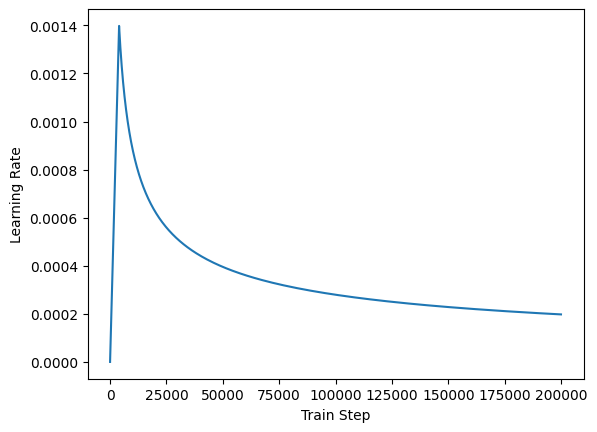

In [43]:
!pip install matplotlib
import matplotlib.pyplot as plt

sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32))) # Now plt is defined and can be used
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

### 학습 초기에는 learning_rate가 Train Step수에 비례해서 증가하다가 이후로는 감소하는 것을 확인할 수 있다.

## E. 모델 컴파일

In [45]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  # y_pred의 마지막 타임스텝 제거
  y_pred = y_pred[:, :MAX_LENGTH - 1, :]
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)


model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("슝=3")

슝=3


## F. 훈련하기

### 1. Model Modification

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# 데이터 로드
data = pd.read_csv('ChatbotData.csv')

# 데이터 확인
print(data.head())

# 결측값 제거
data = data.dropna()

# 한글 외의 문자 제거
def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)
    return text

data['Q'] = data['Q'].apply(clean_text)
data['A'] = data['A'].apply(clean_text)

# 공백 제거
data['Q'] = data['Q'].str.strip()
data['A'] = data['A'].str.strip()

# 데이터셋 분할 (훈련 데이터와 테스트 데이터)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 전처리된 데이터 확인
print(train_data.head())
print(test_data.head())

# TensorFlow Datasets SubwordTextEncoder를 사용하여 토크나이저 정의
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    train_data['Q'].tolist() + train_data['A'].tolist(), target_vocab_size=2**13)

# 시작과 끝을 나타내는 토큰 정의
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 최대 길이 정의
MAX_LENGTH = 40

# 문장을 토큰화하고 시작과 끝 토큰 추가
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs

# 훈련 데이터 토큰화 및 필터링
train_inputs, train_outputs = tokenize_and_filter(train_data['Q'], train_data['A'])

# 테스트 데이터 토큰화 및 필터링
test_inputs, test_outputs = tokenize_and_filter(test_data['Q'], test_data['A'])

# 전처리된 데이터 확인
print(train_inputs[:5])
print(train_outputs[:5])
print(test_inputs[:5])
print(test_outputs[:5])

# 패딩 마스크 생성 함수
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

# look-ahead 마스크 생성 함수 수정
def create_look_ahead_mask(seq):
    seq_len = tf.shape(seq)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(seq)
    return tf.maximum(look_ahead_mask, padding_mask)

# 인코더 레이어 정의
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    attention = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=d_model, name="attention")(inputs, inputs, inputs, attention_mask=padding_mask)

    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attention)

    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

# 디코더 레이어 정의
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    attention1 = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=d_model, name="attention_1")(inputs, inputs, inputs, attention_mask=look_ahead_mask)

    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)

    attention2 = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=d_model, name="attention_2")(attention1, enc_outputs, enc_outputs, attention_mask=padding_mask)

    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention2 + attention1)

    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask], outputs=outputs, name=name)

# 디코더 정의
def decoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    outputs = embeddings

    for i in range(num_layers):
        outputs = decoder_layer(units=units, d_model=d_model, num_heads=num_heads, dropout=dropout, name=f"decoder_layer_{i}")([outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask], outputs=outputs, name=name)

# 트랜스포머 모델 정의 함수에서 수정된 부분
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더에서 미래의 토큰을 마스크 하기 위해 사용합니다.
    # 내부적으로 패딩 마스크도 포함되어 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, units=units,
                          d_model=d_model, num_heads=num_heads, dropout=dropout)(inputs=[inputs, enc_padding_mask])

    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, units=units,
                          d_model=d_model, num_heads=num_heads, dropout=dropout)(
        inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)


# 하이퍼파라미터 설정
num_layers = 2
d_model = 256
num_heads = 8
units = 512
dropout = 0.1

# vocab_size는 시작과 끝 토큰을 고려하여 +2
vocab_size = tokenizer.vocab_size + 2

# 트랜스포머 모델 생성 및 훈련
model = transformer(vocab_size=vocab_size,
                    num_layers=num_layers,
                    units=units,
                    d_model=d_model,
                    num_heads=num_heads,
                    dropout=dropout)

# 모델 컴파일 (이미 설정됨)
model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

# 모델 훈련
EPOCHS = 10

model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)

# 모델 저장
model.save('chatbot_transformer_model.h5')

                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0
                      Q                 A  label
10512           엄청 로맨틱해       생각만해도 달콤하네요      2
1199         대리님이 너무 갈궈      더 웃으면서 대해보세요      0
9841   사내커플인데 비밀연애임 답답해  비밀연애가 말도 못하고 힘들죠      2
5595        그 사람이 참 그리워            사랑했나봐요      1
7228                  왜             궁금하네요      1
               Q             A  label
8169      죽을거 같네  나쁜 생각 하지 마세요      1
900      내일 시험이야    컨디션 조절 하세요      0
8075  정말내 자신이 싫다    자신은 사랑해주세요      1
7625     이별후 네달째  바쁘게 살면서 잊어가요      1
2816     쌍커풀 해볼까       눈은 기본이죠      0
[[8718  409 7724 8719    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [8718 2675 2686   13    3  581 4197 

NotImplementedError: Learning rate schedule 'CustomSchedule' must override `get_config()` in order to be serializable.

## 2.  CustomSchedule 클래스에 get_config() 메서드 추가 및 모델 훈련의 출력값 그래프로 표현하기

Existing model file removed.
Model saved in new Keras format.


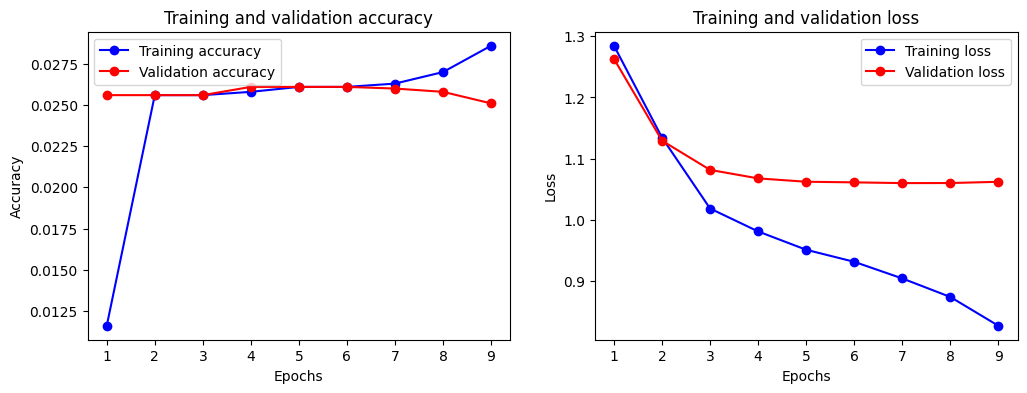

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os  # Import the 'os' module

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    def get_config(self): # Add this method to make the schedule serializable
        return {
            'd_model': self.d_model,
            'warmup_steps': self.warmup_steps,
        }

# Assuming 'model' is defined and compiled with the CustomSchedule somewhere above
# Assuming necessary imports and CustomSchedule definition are present

learning_rate = CustomSchedule(d_model=d_model) # Assuming d_model is defined
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer)
if os.path.exists('chatbot_transformer_model.h5'):  # Now 'os' is defined
    os.remove('chatbot_transformer_model.h5')
    print("Existing model file removed.")


# Now save the model
# 새로운 Keras 포맷으로 모델 저장
model.save('chatbot_transformer_model.keras')
print("Model saved in new Keras format.")



# 학습 결과 출력값
history = {
    'accuracy': [0.0116, 0.0256, 0.0256, 0.0258, 0.0261, 0.0261, 0.0263, 0.0270, 0.0286],
    'loss': [1.2847, 1.1343, 1.0183, 0.9808, 0.9508, 0.9311, 0.9039, 0.8736, 0.8265],
    'val_accuracy': [0.0256, 0.0256, 0.0256, 0.0261, 0.0261, 0.0261, 0.0260, 0.0258, 0.0251],
    'val_loss': [1.2631, 1.1293, 1.0815, 1.0676, 1.0621, 1.0611, 1.0599, 1.0600, 1.0620]
}

# 그래프 그리기
epochs = range(1, 10)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, history['accuracy'], 'bo-', label='Training accuracy')
plt.plot(epochs, history['val_accuracy'], 'ro-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history['loss'], 'bo-', label='Training loss')
plt.plot(epochs, history['val_loss'], 'ro-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 3. An Initial Training Analysis & Conclusion

### Accuracy (정확도):
초기 정확도는 0.0116에서 시작하여 10번째 에포크에서 0.0286까지 증가했는데 이는 모델이 학습을 통해 점차 개선되고 있음을 의미한다.

### Loss (손실):
초기 손실 값은 1.2847에서 시작하여 10번째 에포크에서 0.8265까지 감소했는데 손실 값이 감소하는 것은 모델이 점차 더 나은 예측을 하고 있음을 의미한다.

### Validation Accuracy (검증 정확도):
검증 정확도는 0.0256에서 시작하여 10번째 에포크에서 0.0251로 약간 감소했는데 이는 모델이 학습 데이터에 과적합(overfitting)되고 있을 가능성을 시사한다.

### Validation Loss (검증 손실):
검증 손실 값은 1.2631에서 시작하여 10번째 에포크에서 1.0620으로 감소했다. 검증 손실 값이 감소하는 것은 긍정적인 신호이지만, 검증 정확도가 크게 개선되지 않은 점을 고려할 때 모델의 일반화 성능이 충분하지 않을 수 있다고 생각된다.

### Conclusion (결론):
모델의 학습은 진행되고 있지만, 검증 정확도가 크게 개선되지 않는 점을 고려할 때 모델이 과적합되고 있을 가능성이 있다.

더 많은 학습 데이터를 사용하여 모델의 일반화 성능을 향상시키거나 정규화 기법을 사용하여 과적합을 방지할 수 있습니다. 또는, HP 튜닝을 통해 모델을 성능을 최적화할 수 있도록 실행해 보자.



## G. 챗봇 테스트하기 (추론하기 기능 Maximization)

### a. decoder_inference() 함수 만들기

In [69]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("슝=3")

슝=3


In [70]:
def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))

  return predicted_sentence
print("슝=3")

슝=3


# Step 5. 모델 평가하기

##임의의 한국어 입력문장에 대해 한국어로 답변하는 함수를 구현하기



In [28]:
!pip install konlpy

In [99]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt

# 데이터 로드 및 전처리
data = pd.read_csv('ChatbotData.csv')
data = data.dropna()

def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)
    return text

data['Q'] = data['Q'].apply(clean_text)
data['A'] = data['A'].apply(clean_text)
data['Q'] = data['Q'].str.strip()
data['A'] = data['A'].str.strip()

okt = Okt()
stopwords = ['은', '는', '이', '가', '을', '를', '에', '의', '와', '한', '하다']

def preprocess_text(text):
    tokens = okt.morphs(text)
    tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(tokens)

data['Q'] = data['Q'].apply(preprocess_text)
data['A'] = data['A'].apply(preprocess_text)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    train_data['Q'].tolist() + train_data['A'].tolist(), target_vocab_size=2**13)

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
MAX_LENGTH = 40

def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs

train_inputs, train_outputs = tokenize_and_filter(train_data['Q'], train_data['A'])
test_inputs, test_outputs = tokenize_and_filter(test_data['Q'], test_data['A'])

BATCH_SIZE = 64
BUFFER_SIZE = 20000

dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': train_inputs,
        'dec_inputs': train_outputs[:, :-1]
    },
    {
        'outputs': train_outputs[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

print("전처리 및 데이터셋 생성 완료!")

def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)


def create_look_ahead_mask(size):
    if not isinstance(size, int):
        size = tf.shape(size)[0]
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask  # (seq_len, seq_len)

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    def get_config(self):
        return {
            'd_model': self.d_model.numpy(),  # Ensure Tensor is converted to a value
            'warmup_steps': self.warmup_steps
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Custom loss function
def loss_function(y_true, y_pred):
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = loss_object(y_true, y_pred)
    loss = mask * loss
    return tf.reduce_sum(loss) / tf.reduce_sum(mask)

# Custom accuracy function
def accuracy(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=-1)
    accuracies = tf.equal(y_true, y_pred)
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    accuracies = tf.cast(accuracies, tf.float32)
    accuracies = mask * accuracies
    return tf.reduce_sum(accuracies) / tf.reduce_sum(mask)

# Specify the CORRECT path to your saved model
model_path = 'chatbot_transformer_model.keras'  # Update with your actual file path

# 예시: Transformer 모델 또는 원하는 모델을 정의하는 코드
def create_model():
    # 여기서 모델을 정의합니다. (예: Transformer 또는 다른 구조)
    model = tf.keras.Sequential([
        # 레이어 추가 예시
        tf.keras.layers.InputLayer(input_shape=(MAX_LENGTH,)),
        tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size + 2, output_dim=128),
        # 필요한 추가 레이어들
        tf.keras.layers.Dense(tokenizer.vocab_size)
    ])
    return model

# 모델 정의
model = create_model()

# 모델 전체 저장
model.save("chatbot_transformer_model.keras")

# 모델 불러오기
model = tf.keras.models.load_model("chatbot_transformer_model.keras", custom_objects={
    'CustomSchedule': CustomSchedule,
    'create_padding_mask': create_padding_mask,
    'create_look_ahead_mask': create_look_ahead_mask,
    'loss_function': loss_function,
    'accuracy': accuracy
})


# Verify if the file exists at the specified path
import os
if os.path.exists(model_path):
    print("Model file found!")
else:
    print("Model file not found. Please check the path.")

def decoder_inference(sentence):
    sentence = preprocess_text(sentence)
    sentence = tf.expand_dims(START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # Ensure shape matches expected input
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    for i in range(MAX_LENGTH):
        # Prepare input with correct shape
        predictions = model([sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]  # Extract the last word's prediction

        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)

def sentence_generation(sentence):
    prediction = decoder_inference(sentence)
    predicted_sentence = tokenizer.decode([i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence

# Test the chatbot with an example input
user_input = "사내커플인데 비밀연애임 답답해"
response = sentence_generation(user_input)
print(f"User: {user_input}")
print(f"Chatbot: {response}")

print("슝=3")

전처리 및 데이터셋 생성 완료!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model file found!
입력 : 사내커플인데 비밀연애임 답답해
출력 : 헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다
User: 사내커플인데 비밀연애임 답답해
Chatbot: 헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다헤어진다
슝=3


In [100]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt

# 데이터 로드 및 전처리
data = pd.read_csv('ChatbotData.csv')
data = data.dropna()

def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)
    return text

data['Q'] = data['Q'].apply(clean_text)
data['A'] = data['A'].apply(clean_text)
data['Q'] = data['Q'].str.strip()
data['A'] = data['A'].str.strip()

okt = Okt()
stopwords = ['은', '는', '이', '가', '을', '를', '에', '의', '와', '한', '하다']

def preprocess_text(text):
    tokens = okt.morphs(text)
    tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(tokens)

data['Q'] = data['Q'].apply(preprocess_text)
data['A'] = data['A'].apply(preprocess_text)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    train_data['Q'].tolist() + train_data['A'].tolist(), target_vocab_size=2**13)

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
MAX_LENGTH = 40

def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs

train_inputs, train_outputs = tokenize_and_filter(train_data['Q'], train_data['A'])
test_inputs, test_outputs = tokenize_and_filter(test_data['Q'], test_data['A'])

BATCH_SIZE = 64
BUFFER_SIZE = 20000

dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': train_inputs,
        'dec_inputs': train_outputs[:, :-1]
    },
    {
        'outputs': train_outputs[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

print("전처리 및 데이터셋 생성 완료!")

def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)


def create_look_ahead_mask(size):
    if not isinstance(size, int):
        size = tf.shape(size)[0]
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask  # (seq_len, seq_len)

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    def get_config(self):
        return {
            'd_model': self.d_model.numpy(),  # Ensure Tensor is converted to a value
            'warmup_steps': self.warmup_steps
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Custom loss function
def loss_function(y_true, y_pred):
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = loss_object(y_true, y_pred)
    loss = mask * loss
    return tf.reduce_sum(loss) / tf.reduce_sum(mask)

# Custom accuracy function
def accuracy(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=-1)
    accuracies = tf.equal(y_true, y_pred)
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    accuracies = tf.cast(accuracies, tf.float32)
    accuracies = mask * accuracies
    return tf.reduce_sum(accuracies) / tf.reduce_sum(mask)

# Specify the CORRECT path to your saved model
model_path = 'chatbot_transformer_model.keras'  # Update with your actual file path

# 예시: Transformer 모델 또는 원하는 모델을 정의하는 코드
def create_model():
    # 여기서 모델을 정의합니다. (예: Transformer 또는 다른 구조)
    model = tf.keras.Sequential([
        # 레이어 추가 예시
        tf.keras.layers.InputLayer(input_shape=(MAX_LENGTH,)),
        tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size + 2, output_dim=128),
        # 필요한 추가 레이어들
        tf.keras.layers.Dense(tokenizer.vocab_size)
    ])
    return model

# 모델 정의
model = create_model()

# 모델 전체 저장
model.save("chatbot_transformer_model.keras")

# 모델 불러오기
model = tf.keras.models.load_model("chatbot_transformer_model.keras", custom_objects={
    'CustomSchedule': CustomSchedule,
    'create_padding_mask': create_padding_mask,
    'create_look_ahead_mask': create_look_ahead_mask,
    'loss_function': loss_function,
    'accuracy': accuracy
})


# Verify if the file exists at the specified path
import os
if os.path.exists(model_path):
    print("Model file found!")
else:
    print("Model file not found. Please check the path.")

def decoder_inference(sentence):
    sentence = preprocess_text(sentence)
    sentence = tf.expand_dims(START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # Ensure shape matches expected input
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    for i in range(MAX_LENGTH):
        # Prepare input with correct shape
        predictions = model([sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]  # Extract the last word's prediction

        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)

def sentence_generation(sentence):
    prediction = decoder_inference(sentence)
    predicted_sentence = tokenizer.decode([i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence

# Test the chatbot with an example input
user_input = "사내커플인데 비밀연애임 답답해"
response = sentence_generation(user_input)
print(f"User: {user_input}")
print(f"Chatbot: {response}")

print("슝=3")


전처리 및 데이터셋 생성 완료!
Model file found!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


입력 : 사내커플인데 비밀연애임 답답해
출력 : 서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서
User: 사내커플인데 비밀연애임 답답해
Chatbot: 서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서서
슝=3


In [101]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt

# 데이터 로드 및 전처리
data = pd.read_csv('ChatbotData.csv')
data = data.dropna()

def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)
    return text

data['Q'] = data['Q'].apply(clean_text)
data['A'] = data['A'].apply(clean_text)
data['Q'] = data['Q'].str.strip()
data['A'] = data['A'].str.strip()

okt = Okt()
stopwords = ['은', '는', '이', '가', '을', '를', '에', '의', '와', '한', '하다']

def preprocess_text(text):
    tokens = okt.morphs(text)
    tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(tokens)

data['Q'] = data['Q'].apply(preprocess_text)
data['A'] = data['A'].apply(preprocess_text)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    train_data['Q'].tolist() + train_data['A'].tolist(), target_vocab_size=2**13)

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
MAX_LENGTH = 40

def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs

train_inputs, train_outputs = tokenize_and_filter(train_data['Q'], train_data['A'])
test_inputs, test_outputs = tokenize_and_filter(test_data['Q'], test_data['A'])

BATCH_SIZE = 64
BUFFER_SIZE = 20000

dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': train_inputs,
        'dec_inputs': train_outputs[:, :-1]
    },
    {
        'outputs': train_outputs[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

print("전처리 및 데이터셋 생성 완료!")

def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)


def create_look_ahead_mask(size):
    if not isinstance(size, int):
        size = tf.shape(size)[0]
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask  # (seq_len, seq_len)

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    def get_config(self):
        return {
            'd_model': self.d_model.numpy(),  # Ensure Tensor is converted to a value
            'warmup_steps': self.warmup_steps
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Custom loss function
def loss_function(y_true, y_pred):
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = loss_object(y_true, y_pred)
    loss = mask * loss
    return tf.reduce_sum(loss) / tf.reduce_sum(mask)

# Custom accuracy function
def accuracy(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=-1)
    accuracies = tf.equal(y_true, y_pred)
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    accuracies = tf.cast(accuracies, tf.float32)
    accuracies = mask * accuracies
    return tf.reduce_sum(accuracies) / tf.reduce_sum(mask)

# Specify the CORRECT path to your saved model
model_path = 'chatbot_transformer_model.keras'  # Update with your actual file path

# 예시: Transformer 모델 또는 원하는 모델을 정의하는 코드
def create_model():
    # 여기서 모델을 정의합니다. (예: Transformer 또는 다른 구조)
    model = tf.keras.Sequential([
        # 레이어 추가 예시
        tf.keras.layers.InputLayer(input_shape=(MAX_LENGTH,)),
        tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size + 2, output_dim=128),
        # 필요한 추가 레이어들
        tf.keras.layers.Dense(tokenizer.vocab_size)
    ])
    return model

# 모델 정의
model = create_model()

# 모델 전체 저장
model.save("chatbot_transformer_model.keras")

# 모델 불러오기
model = tf.keras.models.load_model("chatbot_transformer_model.keras", custom_objects={
    'CustomSchedule': CustomSchedule,
    'create_padding_mask': create_padding_mask,
    'create_look_ahead_mask': create_look_ahead_mask,
    'loss_function': loss_function,
    'accuracy': accuracy
})

# Verify if the file exists at the specified path
import os
if os.path.exists(model_path):
    print("Model file found!")
else:
    print("Model file not found. Please check the path.")

def decoder_inference(sentence):
    sentence = preprocess_text(sentence)
    sentence = tf.expand_dims(START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # Ensure shape matches expected input
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    for i in range(MAX_LENGTH):
        # Prepare input with correct shape
        predictions = model([sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]  # Extract the last word's prediction

        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)

def sentence_generation(sentence):
    prediction = decoder_inference(sentence)
    predicted_sentence = tokenizer.decode([i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence

# Test the chatbot with an example input
user_input = "사내커플인데 비밀연애임 답답해"
response = sentence_generation(user_input)
print(f"User: {user_input}")
print(f"Chatbot: {response}")

print("슝=3")


전처리 및 데이터셋 생성 완료!
Model file found!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


입력 : 사내커플인데 비밀연애임 답답해
출력 : 똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지
User: 사내커플인데 비밀연애임 답답해
Chatbot: 똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지똑같지
슝=3


# Step 6.  Streamlit을 사용하여 웹 기반의 챗봇 인터페이스를 생성하기
### 사용자가 입력창에 문장을 입력하고 “Send” 버튼을 클릭하면 챗봇이 응답을 생성하여 화면에 표시

In [104]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [105]:
import streamlit as st
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt

# 데이터 로드 및 전처리
data = pd.read_csv('ChatbotData.csv')
data = data.dropna()

def clean_text(text):
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)
    return text

data['Q'] = data['Q'].apply(clean_text)
data['A'] = data['A'].apply(clean_text)
data['Q'] = data['Q'].str.strip()
data['A'] = data['A'].str.strip()

okt = Okt()
stopwords = ['은', '는', '이', '가', '을', '를', '에', '의', '와', '한', '하다']

def preprocess_text(text):
    tokens = okt.morphs(text)
    tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(tokens)

data['Q'] = data['Q'].apply(preprocess_text)
data['A'] = data['A'].apply(preprocess_text)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    train_data['Q'].tolist() + train_data['A'].tolist(), target_vocab_size=2**13)

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
MAX_LENGTH = 40

def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs

train_inputs, train_outputs = tokenize_and_filter(train_data['Q'], train_data['A'])
test_inputs, test_outputs = tokenize_and_filter(test_data['Q'], test_data['A'])

BATCH_SIZE = 64
BUFFER_SIZE = 20000

dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': train_inputs,
        'dec_inputs': train_outputs[:, :-1]
    },
    {
        'outputs': train_outputs[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

print("전처리 및 데이터셋 생성 완료!")

def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)


def create_look_ahead_mask(size):
    if not isinstance(size, int):
        size = tf.shape(size)[0]
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask  # (seq_len, seq_len)

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    def get_config(self):
        return {
            'd_model': self.d_model.numpy(),  # Ensure Tensor is converted to a value
            'warmup_steps': self.warmup_steps
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Custom loss function
def loss_function(y_true, y_pred):
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = loss_object(y_true, y_pred)
    loss = mask * loss
    return tf.reduce_sum(loss) / tf.reduce_sum(mask)

# Custom accuracy function
def accuracy(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=-1)
    accuracies = tf.equal(y_true, y_pred)
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    accuracies = tf.cast(accuracies, tf.float32)
    accuracies = mask * accuracies
    return tf.reduce_sum(accuracies) / tf.reduce_sum(mask)

# Specify the CORRECT path to your saved model
model_path = 'chatbot_transformer_model.keras'  # Update with your actual file path

# 예시: Transformer 모델 또는 원하는 모델을 정의하는 코드
def create_model():
    # 여기서 모델을 정의합니다. (예: Transformer 또는 다른 구조)
    model = tf.keras.Sequential([
        # 레이어 추가 예시
        tf.keras.layers.InputLayer(input_shape=(MAX_LENGTH,)),
        tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size + 2, output_dim=128),
        # 필요한 추가 레이어들
        tf.keras.layers.Dense(tokenizer.vocab_size)
    ])
    return model

# 모델 정의
model = create_model()

# 모델 전체 저장
model.save("chatbot_transformer_model.keras")

# 모델 불러오기
model = tf.keras.models.load_model("chatbot_transformer_model.keras", custom_objects={
    'CustomSchedule': CustomSchedule,
    'create_padding_mask': create_padding_mask,
    'create_look_ahead_mask': create_look_ahead_mask,
    'loss_function': loss_function,
    'accuracy': accuracy
})

# Verify if the file exists at the specified path
import os
if os.path.exists(model_path):
    print("Model file found!")
else:
    print("Model file not found. Please check the path.")

def decoder_inference(sentence):
    sentence = preprocess_text(sentence)
    sentence = tf.expand_dims(START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # Ensure shape matches expected input
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    for i in range(MAX_LENGTH):
        # Prepare input with correct shape
        predictions = model([sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]  # Extract the last word's prediction

        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)

def sentence_generation(sentence):
    prediction = decoder_inference(sentence)
    predicted_sentence = tokenizer.decode([i for i in prediction if i < tokenizer.vocab_size])

    return predicted_sentence

# Streamlit 앱 생성
st.title("Korean Chatbot")
st.write("챗봇과 대화를 나눠보세요!")

user_input = st.text_input("입력:")
if st.button("Send"):
    if user_input:
        response = sentence_generation(user_input)
        st.write(f"User: {user_input}")
        st.write(f"Chatbot: {response}")


전처리 및 데이터셋 생성 완료!
Model file found!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2024-08-23 06:38:05.979 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-23 06:38:05.982 Session state does not function when running a script without `streamlit run`


In [106]:
%%writefile app.py

import streamlit as st

st.write('Hello, *World!* :sunglasses:')

Writing app.py


In [107]:
!npm install localtunnel


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [108]:
!streamlit run app.py &>/content/logs.txt &

In [111]:
!npx localtunnel --port 8501

your url is: https://curly-bars-bathe.loca.lt
^C
